In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
dir = '/home/pz/sparsity/runs/imagenet1k/af/augmented_flatness/vanilla'
len_dataloader = 468
os.makedirs(os.path.join(dir, 'output'), exist_ok=True)

# Read Files

In [3]:
csv_dir = os.path.join(dir, 'csv')

In [4]:
def find_csvs(root, current):
    full_dir = os.path.join(root, current)
    csv_full_path = os.path.join(full_dir, 'data.csv')
    if os.path.isfile(csv_full_path):
        raw_array = np.genfromtxt(csv_full_path, delimiter=',')
        filtered_dict = {}
        for (step, value) in raw_array:
            filtered_dict[int(step)] = value
        filtered_array = np.array([t for t in filtered_dict.items()])
        df = pd.DataFrame(filtered_array, columns=['step', current])
        df['step'] = df['step'].astype(int)
        if 'augmented_flatness_cifar10' in dir:
            df = df[df['step'] != 600]
            df['step'] = ((df['step'] % 24 == 0) & (df['step'] % 25 != 0)) * (df['step'] // 24 * 468) + ((df['step'] % 24 != 0) | (df['step'] % 25 == 0)) * df['step']
        if '10epochs' in dir:
            df = df[df['step'] <= 10 *len_dataloader]
        df.set_index('step', inplace=True)
        df = df.sort_index()
        return df
    else:
        res = None
        for d in os.listdir(full_dir):
            if res is None:

                res = find_csvs(root, os.path.join(current, d))
            else:
                res = pd.merge(res, find_csvs(root, os.path.join(current, d)), on='step', how='outer')
        return res 
all_data = find_csvs(csv_dir, '')
if 'correct' in dir:
    for col in all_data.columns:
        if 'acc' not in col:
            all_data[col] = all_data[col] / all_data["augmented_flatness_acc"] 
all_data

,augmented_flatness/model.encoder.layers.encoder_layer_2.mlp.key,augmented_flatness/model.encoder.layers.encoder_layer_10.mlp.key,augmented_flatness/model.encoder.layers.encoder_layer_9.mlp.value,augmented_flatness/model.encoder.layers.encoder_layer_7.mlp.value,augmented_flatness/model.encoder.layers.encoder_layer_3.mlp.value,augmented_flatness/model.encoder.layers.encoder_layer_9.mlp.key,augmented_flatness/model.encoder.layers.encoder_layer_3.mlp.key,augmented_flatness/model.encoder.layers.encoder_layer_11.mlp.key,augmented_flatness/model.encoder.layers.encoder_layer_1.mlp.value,augmented_flatness/model.encoder.layers.encoder_layer_4.mlp.key,...,coefficients_L0/sum/model.encoder.layers.encoder_layer_11.mlp,coefficients_L0/sum/model.encoder.layers.encoder_layer_5.mlp,coefficients_L0/sum/model.encoder.layers.encoder_layer_9.mlp,coefficients_L0/sum/model.encoder.layers.encoder_layer_7.mlp,coefficients_L0/sum/model.encoder.layers.encoder_layer_3.mlp,coefficients_L0/sum/model.encoder.layers.encoder_layer_8.mlp,coefficients_L0/sum/model.encoder.layers.encoder_layer_2.mlp,acc/5,acc/1,lr
step,,,,,,,,,,,,,,,,,,,,,
25,9.990950,24.135902,19.382998,15.662777,5.534011,13.742841,10.756504,46.783226,1.628372,8.320867,...,7.730414e-05,0.000011,2.270853e-05,0.000013,0.000018,1.514595e-05,1.650894e-05,0.005273,0.000586,0.0
50,19.624420,11.819807,11.224596,8.575760,8.175957,8.739697,11.355378,16.854250,4.535125,5.231225,...,2.784979e-05,0.000008,1.444139e-05,0.000011,0.000019,1.119133e-05,3.242719e-05,0.007178,0.001416,0.0
75,1.684342,6.476264,9.599288,8.878125,7.469844,5.165141,5.941137,8.102837,1.155949,5.136852,...,1.338905e-05,0.000009,8.534827e-06,0.000008,0.000010,7.151297e-06,2.783189e-06,0.008594,0.001514,0.0
100,2.102823,3.533762,9.801153,9.720175,1.958644,2.988148,2.539212,4.208086,1.215202,1.980860,...,6.953399e-06,0.000005,4.937584e-06,0.000005,0.000004,4.295854e-06,3.474683e-06,0.009766,0.002148,0.0
125,2.180115,2.767452,8.382837,7.720897,2.192946,2.338337,1.979070,3.213196,0.358126,1.672783,...,5.309454e-06,0.000004,3.863845e-06,0.000004,0.000003,3.317753e-06,3.602400e-06,0.007617,0.001563,0.0
150,0.573586,2.205188,7.670686,6.453232,1.005998,1.893293,1.417684,2.491967,0.083298,1.510864,...,4.117702e-06,0.000003,3.128458e-06,0.000003,0.000002,2.680118e-06,9.477881e-07,0.008447,0.001416,0.0
175,0.714163,2.212270,7.355383,6.418031,1.445725,1.905421,1.735563,2.524678,0.098526,1.510338,...,4.171752e-06,0.000003,3.148499e-06,0.000003,0.000003,2.760351e-06,1.180076e-06,0.009717,0.001514,0.0
200,0.772719,1.920710,7.751270,7.080147,0.601025,1.677968,1.230474,2.193819,0.084554,1.149492,...,3.625044e-06,0.000002,2.772657e-06,0.000003,0.000002,2.438167e-06,1.276833e-06,0.011621,0.003174,0.0
225,0.636348,1.726517,6.796355,6.376954,0.728886,1.526870,1.126187,1.967599,0.150297,1.093603,...,3.251241e-06,0.000002,2.522984e-06,0.000002,0.000002,2.213162e-06,1.051496e-06,0.008643,0.002393,0.0


# Computations

In [5]:
raw_columns = all_data.columns.tolist()

In [6]:
key_flatness = [c for c in raw_columns if 'flatness' in c and 'key' in c]
all_data['augmented_flatness_keys'] = all_data[key_flatness].mean(axis=1)
all_data['augmented_flatness_keys'], key_flatness

(step
 25         13.466768
 50         12.157345
 75          5.607789
 100         5.274679
 125         6.410145
 150         2.411774
 175         4.228355
 200         4.197955
 225         3.679310
 250         3.957862
 275         4.361834
 300        11.633626
 325         8.939962
 350        97.312877
 375         8.512266
 400         7.867843
 425        20.379175
 450        28.426403
 475        48.228392
 500        96.100858
 525         7.784534
 550         7.362357
 575         4.290367
 600         3.594791
 625         8.891006
 750        24.615583
 875        70.953855
 1000       26.371877
 1125      113.461311
 1250      489.933051
 1375        5.781957
 1500        7.958180
 1625        5.858600
 1750       11.395160
 1875        9.697972
 2000        7.086943
 2125        9.270878
 187500      4.815811
 Name: augmented_flatness_keys, dtype: float64,
 ['augmented_flatness/model.encoder.layers.encoder_layer_2.mlp.key',
  'augmented_flatness/model.encoder.layer

In [7]:
value_flatness = [c for c in raw_columns if 'flatness' in c and 'value' in c]
all_data['augmented_flatness_values'] = all_data[value_flatness].mean(axis=1)
value_flatness

['augmented_flatness/model.encoder.layers.encoder_layer_9.mlp.value',
 'augmented_flatness/model.encoder.layers.encoder_layer_7.mlp.value',
 'augmented_flatness/model.encoder.layers.encoder_layer_3.mlp.value',
 'augmented_flatness/model.encoder.layers.encoder_layer_1.mlp.value',
 'augmented_flatness/model.encoder.layers.encoder_layer_11.mlp.value',
 'augmented_flatness/model.encoder.layers.encoder_layer_0.mlp.value',
 'augmented_flatness/model.encoder.layers.encoder_layer_6.mlp.value',
 'augmented_flatness/model.encoder.layers.encoder_layer_8.mlp.value',
 'augmented_flatness/model.encoder.layers.encoder_layer_2.mlp.value',
 'augmented_flatness/model.encoder.layers.encoder_layer_4.mlp.value',
 'augmented_flatness/model.encoder.layers.encoder_layer_5.mlp.value',
 'augmented_flatness/model.encoder.layers.encoder_layer_10.mlp.value']

In [8]:
L2_coefficients = [c for c in raw_columns if '_L2' in c]
all_data['coefficients_L2'] = all_data[L2_coefficients].mean(axis=1)
all_data['coefficients_L2'], L2_coefficients

(step
 25        0.000009
 50        0.000008
 75        0.000003
 100       0.000003
 125       0.000003
 150       0.000002
 175       0.000003
 200       0.000003
 225       0.000003
 250       0.000003
 275       0.000004
 300       0.000010
 325       0.000009
 350       0.000078
 375       0.000011
 400       0.000007
 425       0.000015
 450       0.000020
 475       0.000113
 500       0.000130
 525       0.000011
 550       0.000013
 575       0.000008
 600       0.000007
 625       0.000018
 750       0.000033
 875       0.000137
 1000      0.000016
 1125      0.000088
 1250      0.000338
 1375      0.000018
 1500      0.000039
 1625      0.000061
 1750      0.000237
 1875      0.000312
 2000      0.000409
 2125      0.000737
 187500    0.000003
 Name: coefficients_L2, dtype: float64,
 ['coefficients_L2/model.encoder.layers.encoder_layer_4.mlp',
  'coefficients_L2/model.encoder.layers.encoder_layer_1.mlp',
  'coefficients_L2/model.encoder.layers.encoder_layer_0.mlp',
  'coeff

In [9]:
def get_layer(layer_name: str):
    layer_id = layer_name.split('_')[-1].split('.')[0]
    try:
        return int(layer_id)
    except:
        return None

In [10]:
L0_sum = [c for c in raw_columns if 'sum' in c]
L0_weight = [c for c in raw_columns if 'weight' in c]
L0_preview = [c for c in raw_columns if 'preview' in c]
L0_names = []
for (sum, weight) in zip(L0_sum, L0_weight):
    layer = get_layer(sum)
    all_data['coefficients_L0_' + str(layer)] = all_data[sum] / all_data[weight]
    L0_names.append('coefficients_L0_' + str(layer))

all_data['coefficients_L0_preview'] = all_data[L0_preview].mean(axis=1)
all_data['coefficients_L0'] = all_data[L0_names].mean(axis=1)
all_data[['coefficients_L0', 'coefficients_L0_preview', 'coefficients_L2']], L0_sum

(        coefficients_L0  coefficients_L0_preview  coefficients_L2
 step                                                             
 25             0.000057                 0.000057         0.000009
 50             0.000053                 0.000053         0.000008
 75             0.000022                 0.000022         0.000003
 100            0.000021                 0.000021         0.000003
 125            0.000025                 0.000025         0.000003
 150            0.000010                 0.000010         0.000002
 175            0.000017                 0.000017         0.000003
 200            0.000017                 0.000017         0.000003
 225            0.000014                 0.000014         0.000003
 250            0.000014                 0.000014         0.000003
 275            0.000015                 0.000015         0.000004
 300            0.000044                 0.000045         0.000010
 325            0.000034                 0.000034         0.00

# Plots

In [11]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font = "Times New Roman"

In [12]:
from math import floor, log10

def format_func(value, tick_number=None):
    num_thousands = 0 if abs(value) < 1000 else floor(log10(abs(value))/3)
    value = round(value / 1000**num_thousands, 2)
    return f'{value:g}'+' KMGTPEZY'[num_thousands]


def plot_columns_log_scale(*dataframes: pd.DataFrame, file_name=None, **kwargs):
    """
    绘制多个 DataFrame 的列（根据列索引）在 log-scale 图上。

    参数：
    *dataframes: 要绘制的 DataFrame
    **kwargs: 可选参数，用于设置图的标签和样式

    返回值：
    None
    """
    fontsize = 58
    fig, ax = plt.subplots(1, 1, figsize=[12, 8])
    ax.tick_params(axis='both', which='major', labelsize=fontsize)

    # 循环遍历传入的 DataFrame
    legend_lines = []
    for df in dataframes:
        # 循环遍历列索引并绘制每个 DataFrame 的列
        for col in df.columns:
            if 'L0' in col:
                label = "L₀"
            elif 'L2'  in col:
                label = "L₂"
            elif 'key' in col.lower():
                label = "ASₖ"
            else:
                label = "ASᵥ"
            legend_line, = ax.plot(df.index, df[col], label=label, linewidth=4)
            legend_lines.append(legend_line)

    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    ax.set_yscale('log')  # 设置 y 轴为对数刻度
    ax.set_xlabel(kwargs.get('xlabel', 'Steps'), fontsize=fontsize)  # x 轴标签
    ax.set_ylabel(kwargs.get('ylabel', 'Values'), fontsize=fontsize)  # y 轴标签

    font_prop = font_manager.FontProperties(family=font, weight='normal', style='normal', size=fontsize)

    if 'spars' in dir[dir.find('sparsity') + len('sparsity'):]:
        ax.legend(handles=legend_lines, fontsize=fontsize*(0.375 if len(legend_lines) > 6 else 0.75))
    else:    
        fig_legend, ax_legend = plt.subplots(1, 1, constrained_layout=True)
        ax_legend.axis('off')
        legend = ax_legend.legend(handles=legend_lines, loc='center', fontsize=fontsize, ncol=4, prop=font_prop)
        for legobj in legend.legend_handles:
            legobj.set_linewidth(8)
        legend_path = os.path.join(dir, 'output', f'{file_name}_legend.jpg')
        fig_legend.tight_layout()
        fig_legend.savefig(legend_path, bbox_inches='tight')
        fig_legend.show()
        print(f"Separate legends at {legend_path}")
    ax.grid(True)  # 添加网格线
    fig.tight_layout()
    if file_name is not None:
        fig.savefig(os.path.join(dir, 'output', f'{file_name}.jpg'))
    fig.show()  # 显示图
    plt.close()

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
/tmp/ipykernel_620328/1366596944.py:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig_legend.tight_layout()
/tmp/ipykernel_620328/1366596944.py:56: UserWarning: The figure layout has changed to tight
  fig_legend.tight_layout()
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font fam

Separate legends at /home/pz/sparsity/runs/imagenet1k/af/augmented_flatness/vanilla/output/averaged_legend.jpg


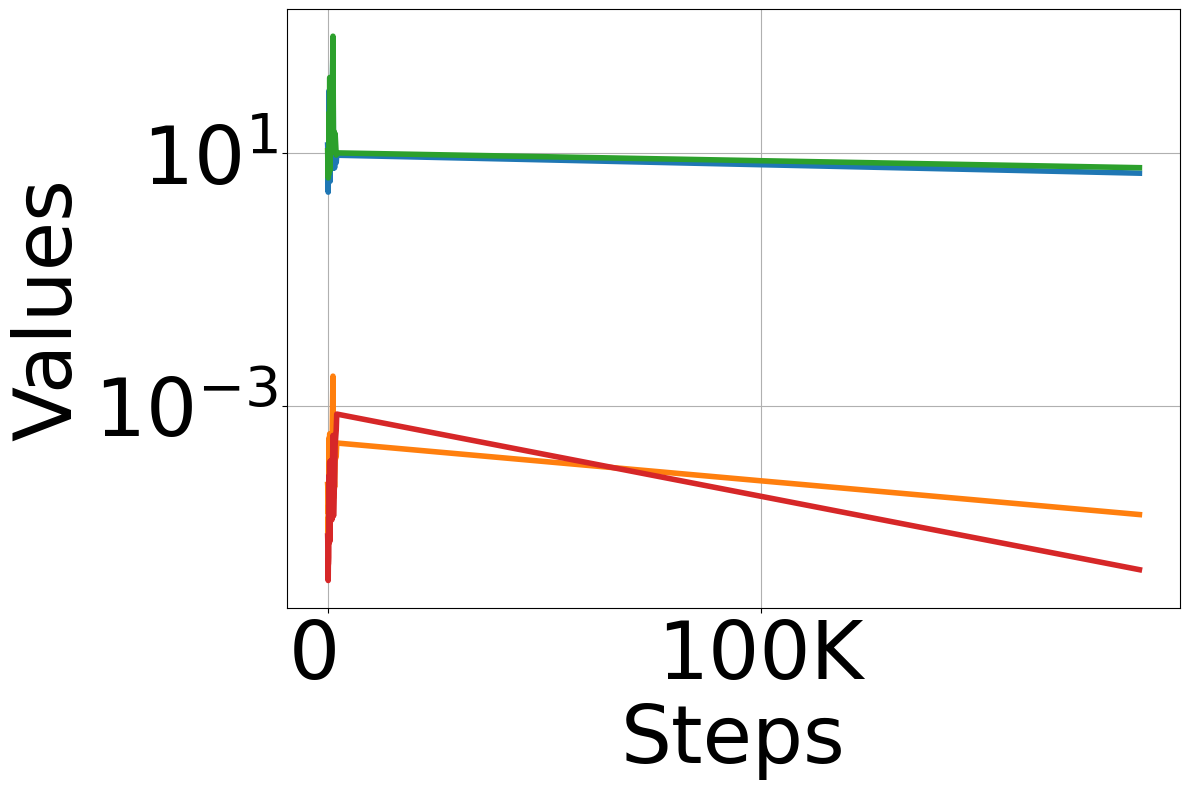

In [13]:
plot_columns_log_scale(all_data[['augmented_flatness_keys', 'coefficients_L0', 'augmented_flatness_values', 'coefficients_L2']], file_name='averaged')


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
/tmp/ipykernel_620328/1366596944.py:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig_legend.tight_layout()
/tmp/ipykernel_620328/1366596944.py:56: UserWarning: The figure layout has changed to tight
  fig_legend.tight_layout()
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font fam

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
/tmp/ipykernel_620328/136659694

Separate legends at /home/pz/sparsity/runs/imagenet1k/af/augmented_flatness/vanilla/output/0_legend.jpg


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
/tmp/ipykernel_620328/1366596944.py:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig_legend.tight_layout()
/tmp/ipykernel_620328/1366596944.py:56: UserWarning: The figure layout has changed to tight
  fig_legend.tight_layout()
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font fam

Separate legends at /home/pz/sparsity/runs/imagenet1k/af/augmented_flatness/vanilla/output/1_legend.jpg


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

Separate legends at /home/pz/sparsity/runs/imagenet1k/af/augmented_flatness/vanilla/output/2_legend.jpg


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
/tmp/ipykernel_620328/1366596944.py:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig_legend.tight_layout()
/tmp/ipykernel_620328/1366596944.py:56: UserWarning: The figure layout has changed to tight
  fig_legend.tight_layout()
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font fam

Separate legends at /home/pz/sparsity/runs/imagenet1k/af/augmented_flatness/vanilla/output/3_legend.jpg


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
/tmp/ipykernel_620328/1366596944.py:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig_legend.tight_layout()
/tmp/ipykernel_620328/1366596944.py:56: UserWarning: The figure layout has changed to tight
  fig_legend.tight_layout()
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font fam

Separate legends at /home/pz/sparsity/runs/imagenet1k/af/augmented_flatness/vanilla/output/4_legend.jpg


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
/tmp/ipykernel_620328/1366596944.py:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig_legend.tight_layout()
/tmp/ipykernel_620328/1366596944.py:56: UserWarning: The figure layout has changed to tight
  fig_legend.tight_layout()
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font fam

Separate legends at /home/pz/sparsity/runs/imagenet1k/af/augmented_flatness/vanilla/output/5_legend.jpg
Separate legends at /home/pz/sparsity/runs/imagenet1k/af/augmented_flatness/vanilla/output/6_legend.jpg


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
/tmp/ipykernel_620328/1366596944.py:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig_legend.tight_layout()
/tmp/ipykernel_620328/1366596944.py:56: UserWarning: The figure layout has changed to tight
  fig_legend.tight_layout()
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font fam

Separate legends at /home/pz/sparsity/runs/imagenet1k/af/augmented_flatness/vanilla/output/7_legend.jpg


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
/tmp/ipykernel_620328/1366596944.py:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig_legend.tight_layout()
/tmp/ipykernel_620328/1366596944.py:56: UserWarning: The figure layout has changed to tight
  fig_legend.tight_layout()
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font fam

Separate legends at /home/pz/sparsity/runs/imagenet1k/af/augmented_flatness/vanilla/output/8_legend.jpg
Separate legends at /home/pz/sparsity/runs/imagenet1k/af/augmented_flatness/vanilla/output/9_legend.jpg


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
/tmp/ipykernel_620328/1366596944.py:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig_legend.tight_layout()
/tmp/ipykernel_620328/1366596944.py:56: UserWarning: The figure layout has changed to tight
  fig_legend.tight_layout()
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font fam

Separate legends at /home/pz/sparsity/runs/imagenet1k/af/augmented_flatness/vanilla/output/10_legend.jpg


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


Separate legends at /home/pz/sparsity/runs/imagenet1k/af/augmented_flatness/vanilla/output/11_legend.jpg


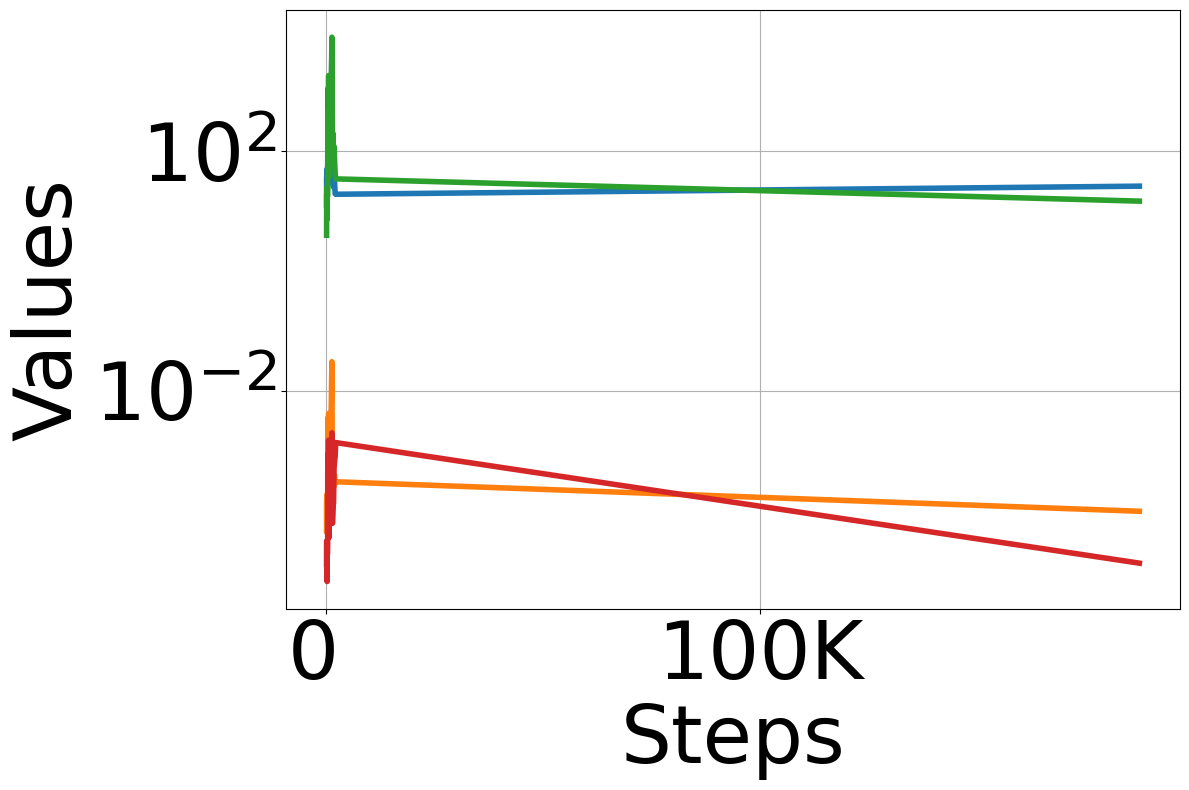

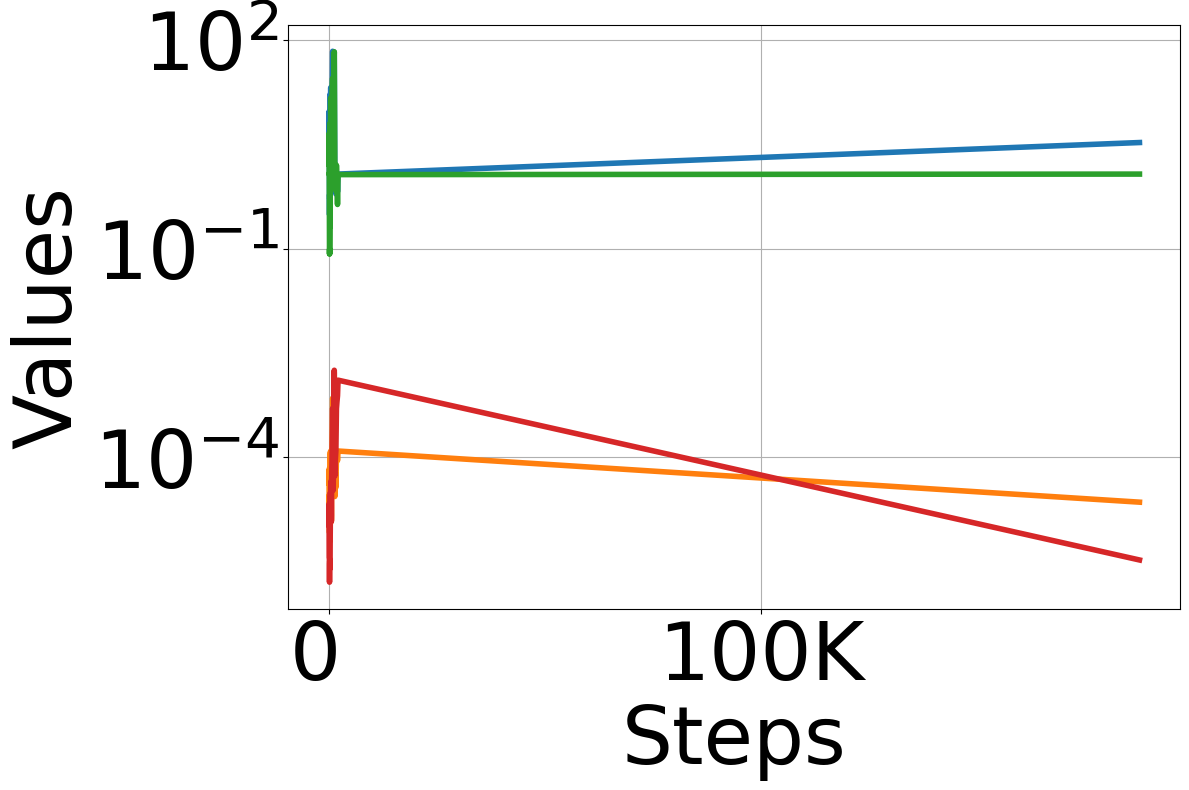

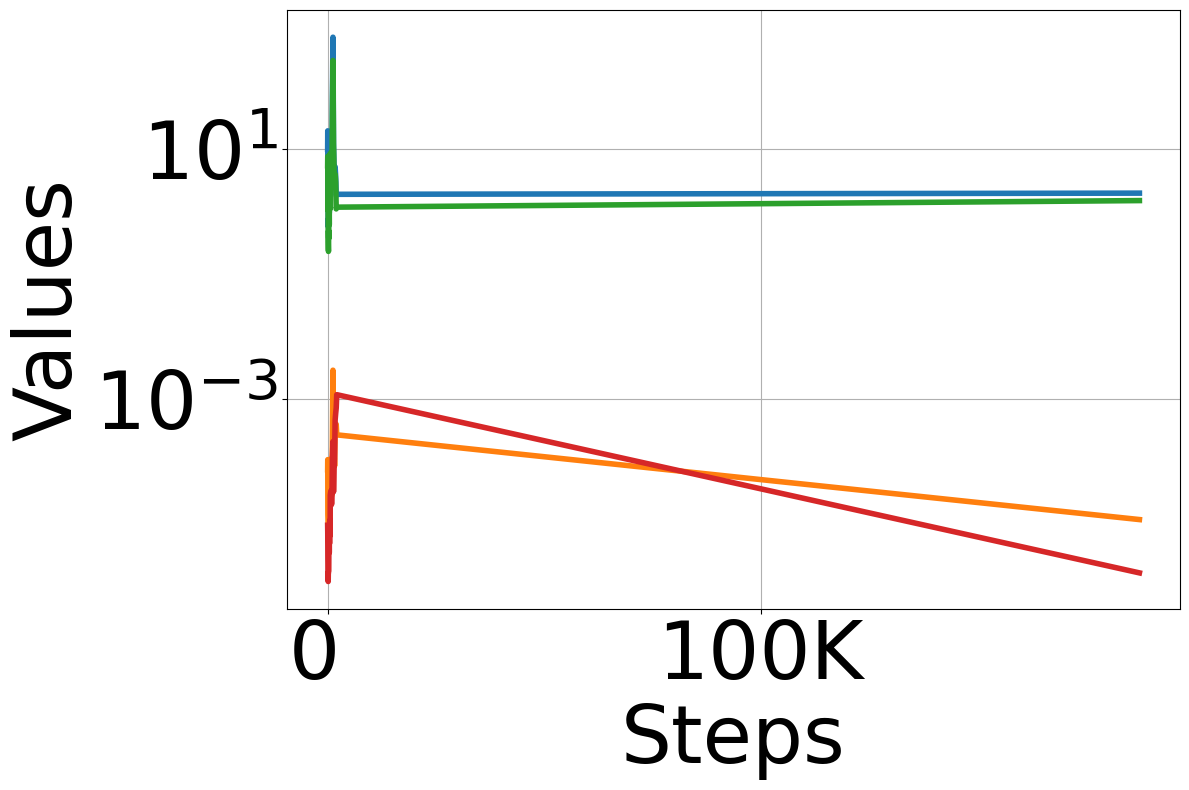

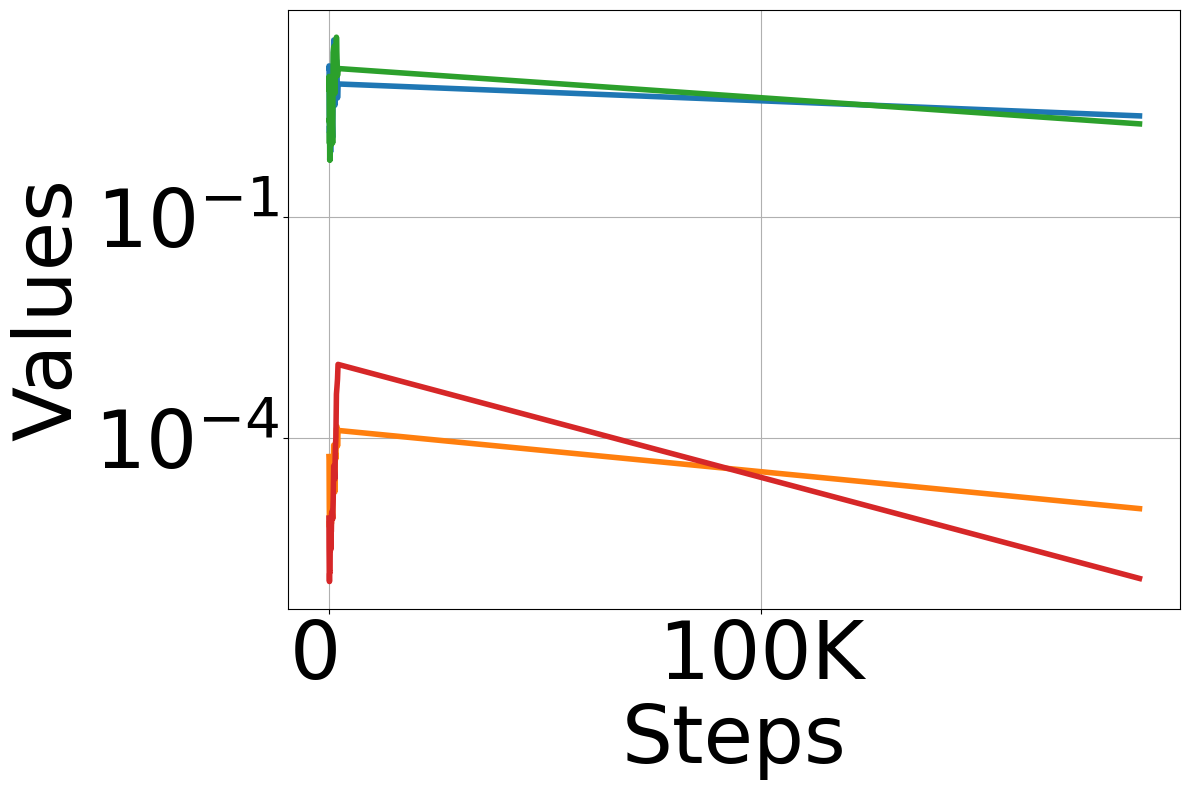

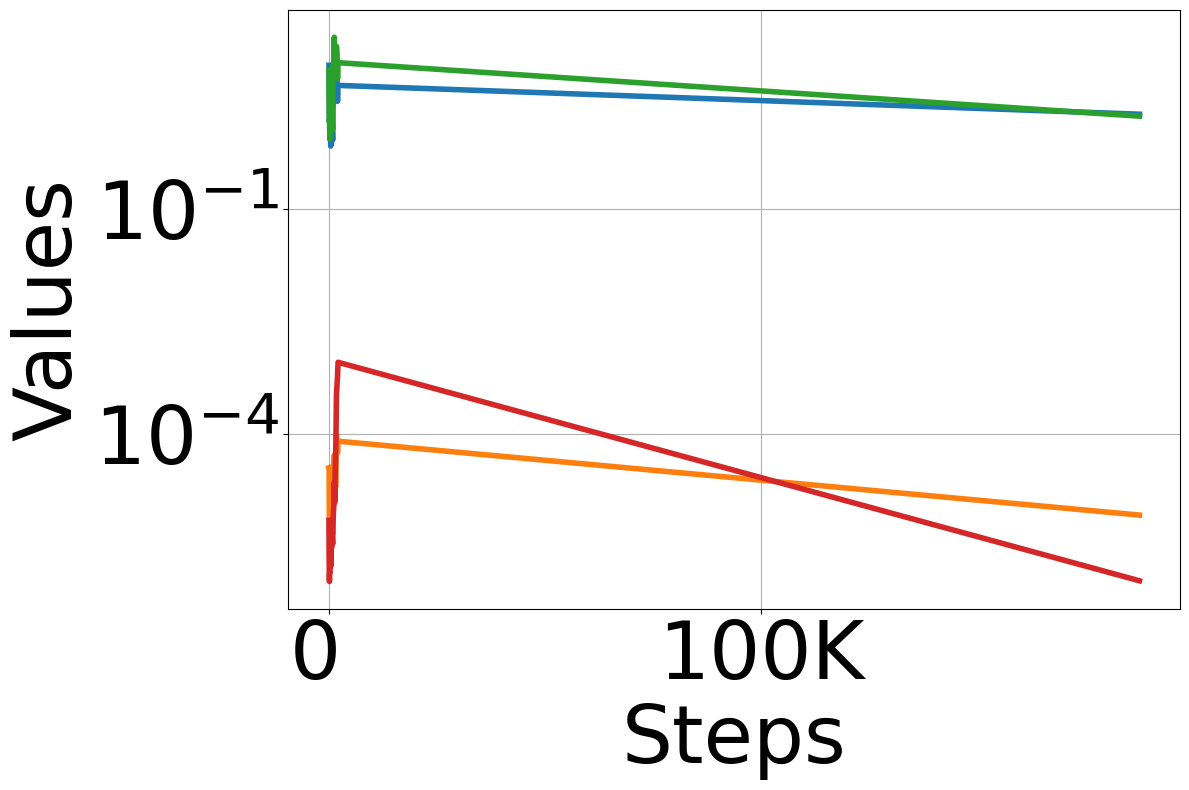

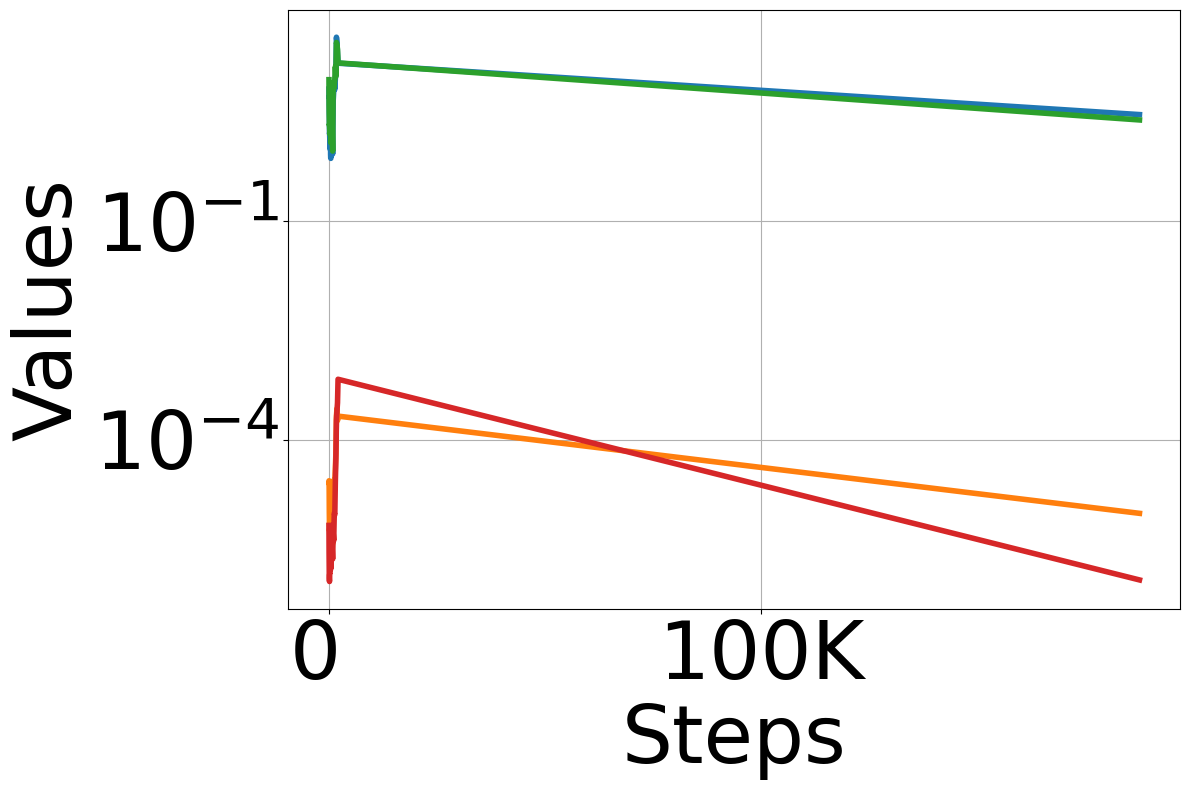

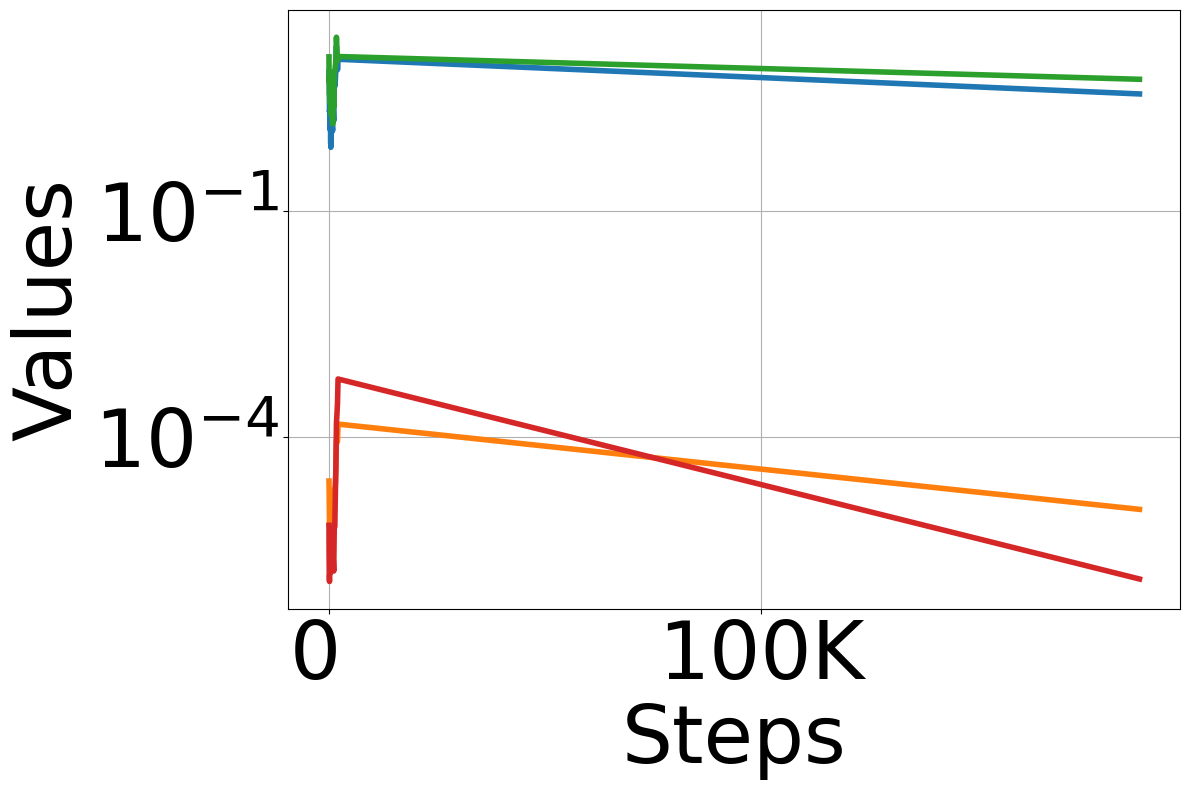

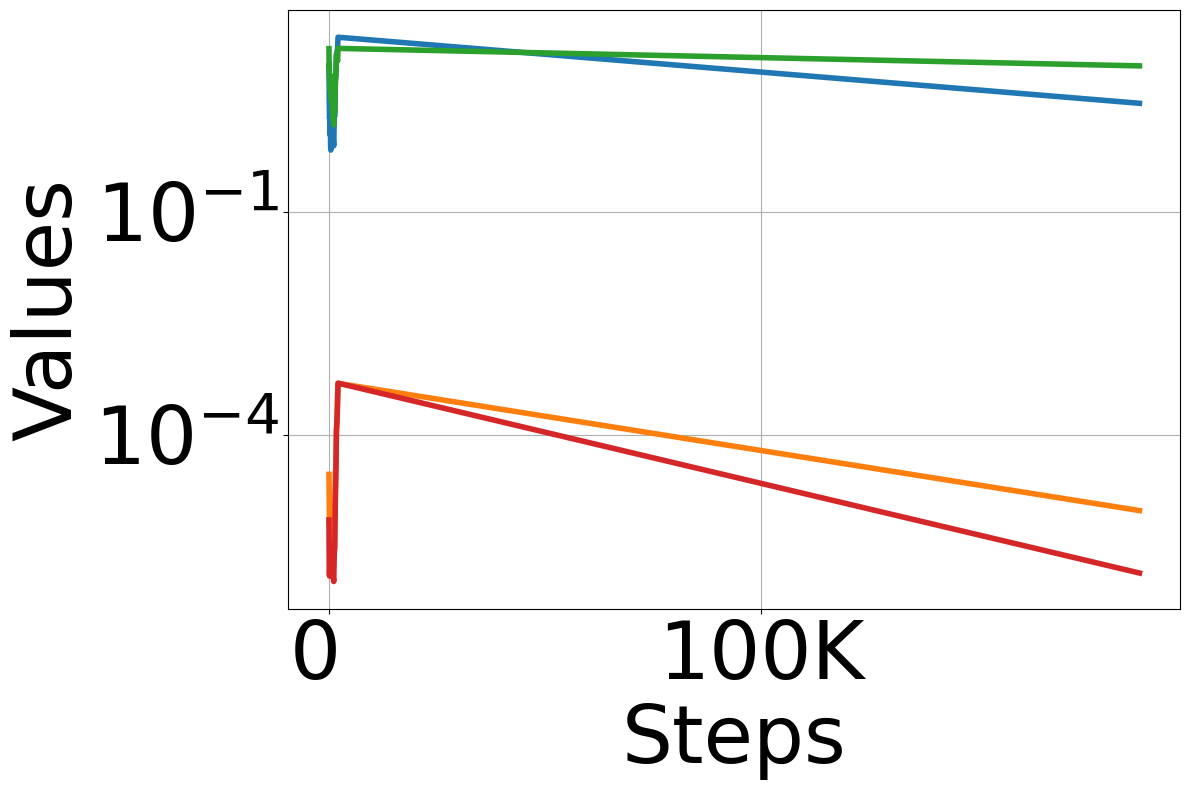

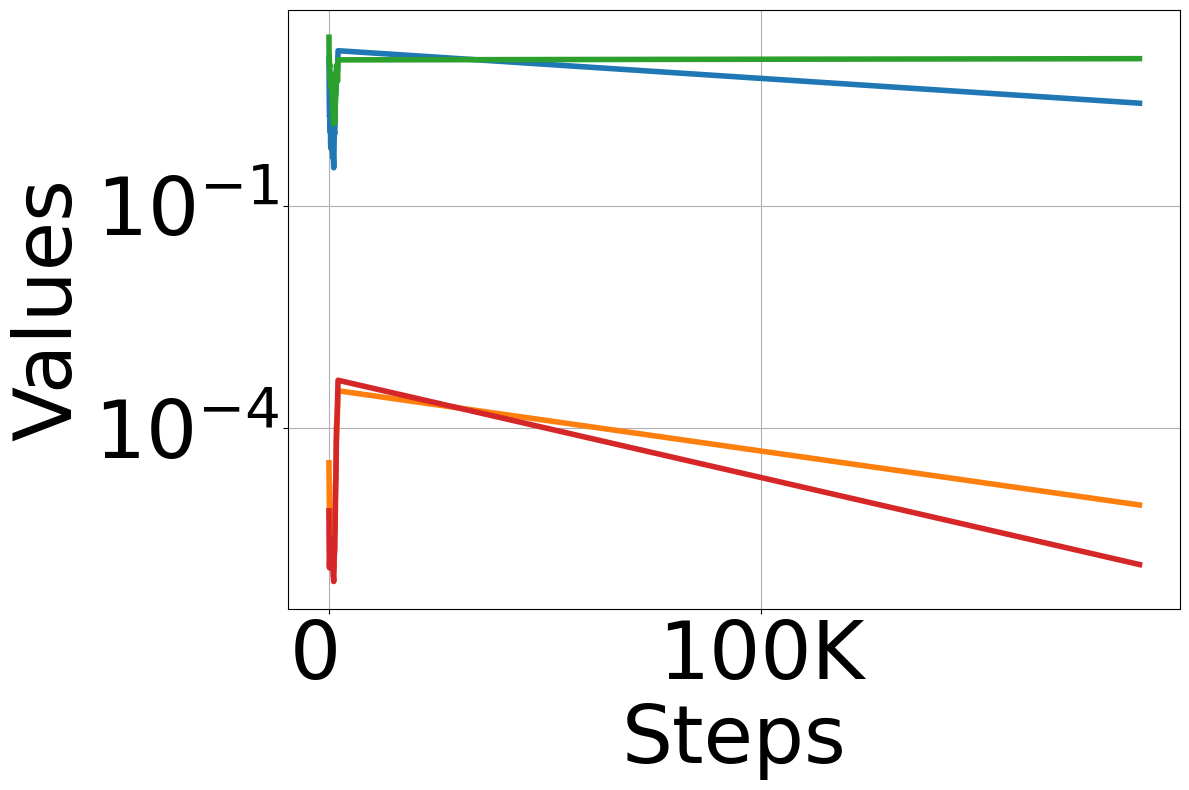

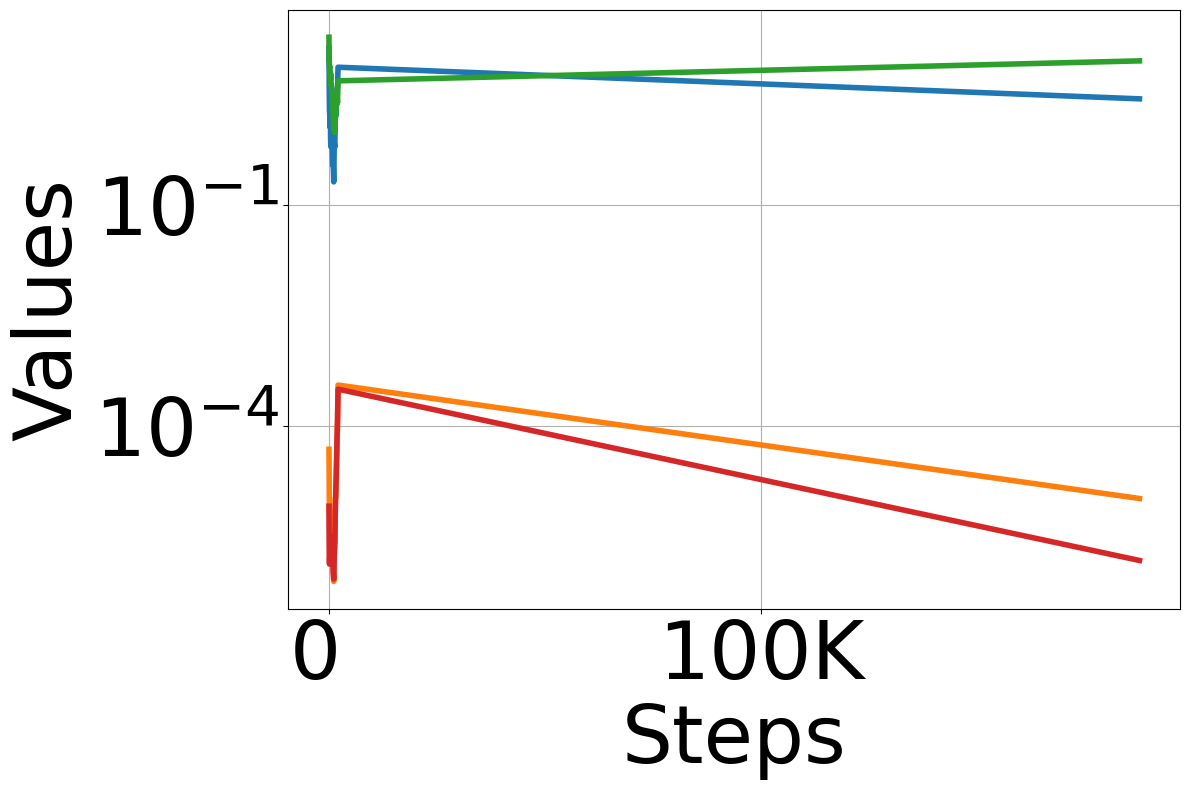

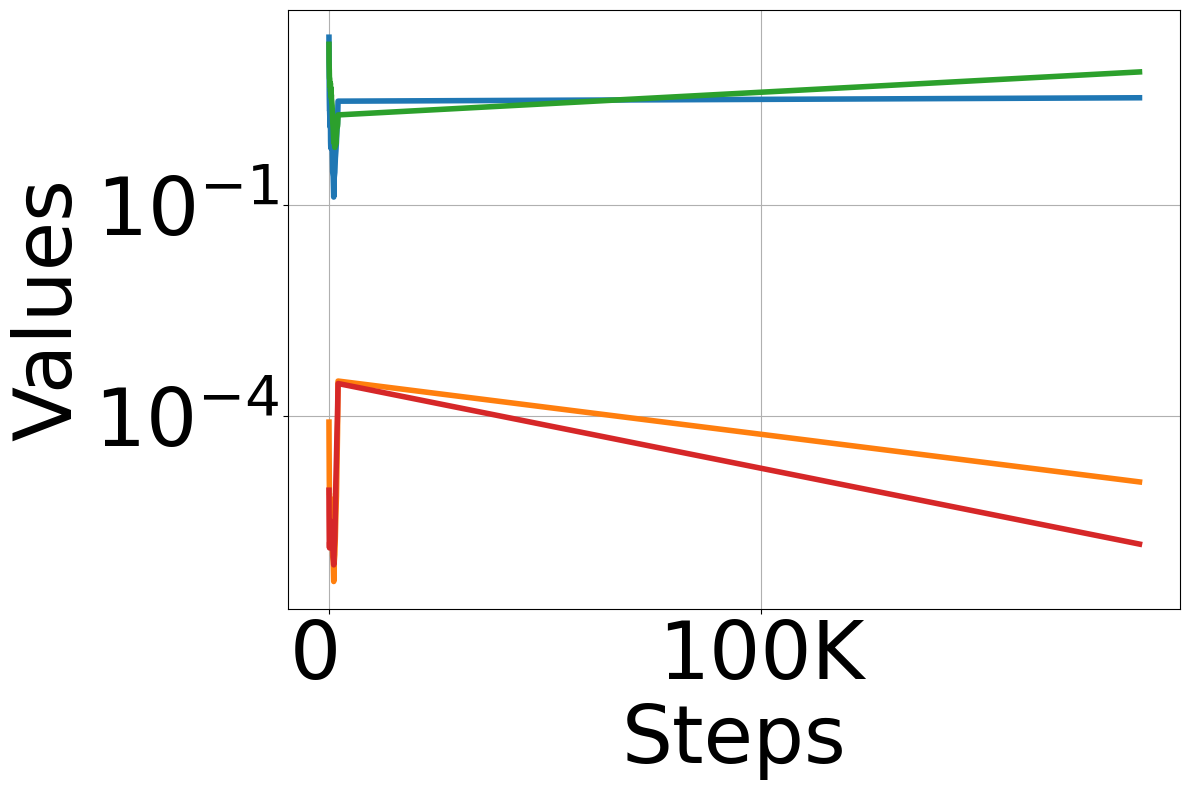

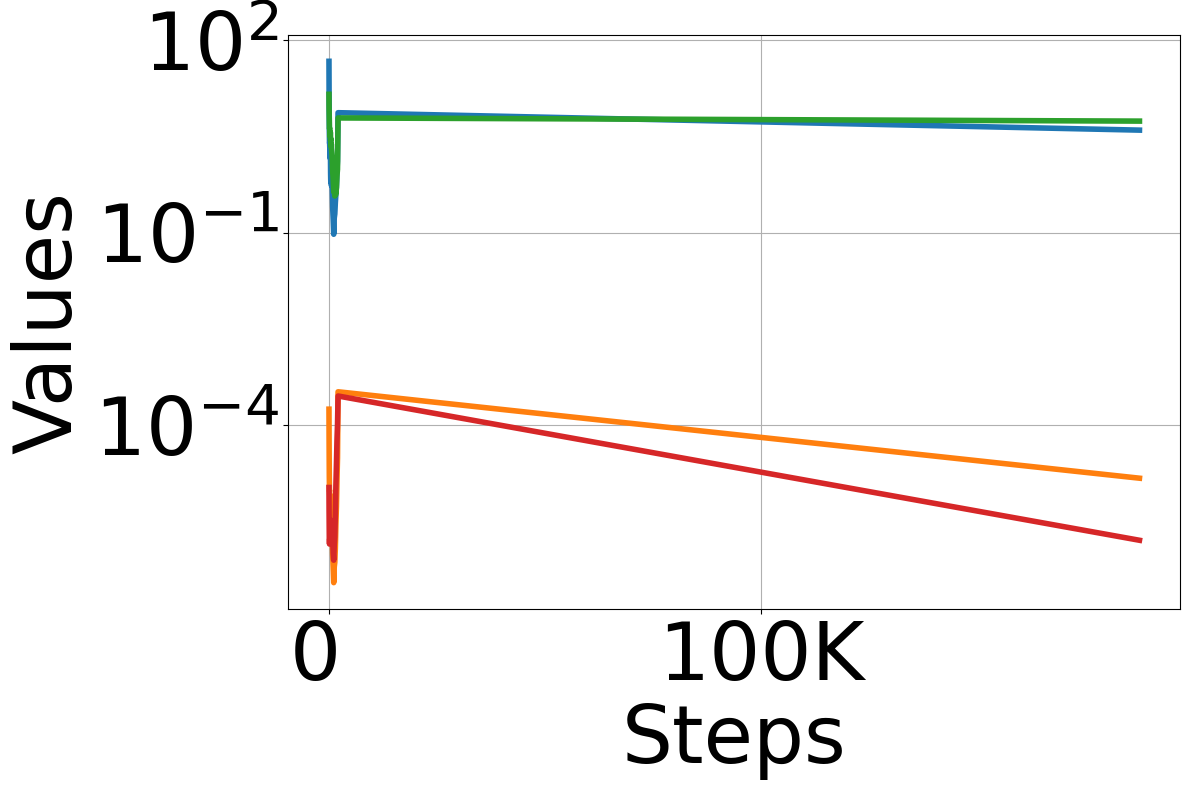

In [14]:
max_layer = max([get_layer(c) or 0 for c in all_data.columns.tolist()])
def filter(s, layer, *keywords):
    if layer is None:
        return s == keywords[0] 
    return  all([k in s for k in keywords]) and f'_{layer}.' in s
def get_filtered_columns(layer, *keywords):
    cols = all_data.columns.tolist()
    return [c for c in cols if filter(c, layer, *keywords)]

for layer in range(max_layer + 1):
    key_augmented_flatness_name = get_filtered_columns(layer, 'flatness', 'key')
    value_augmented_flatness_name = get_filtered_columns(layer, 'flatness', 'value')
    L0_coefficients = get_filtered_columns(None, 'coefficients_L0_' + str(layer))
    L2_coefficients = get_filtered_columns(layer, '_L2')
    columns = (key_augmented_flatness_name + L0_coefficients + value_augmented_flatness_name + L2_coefficients)
    plot_columns_log_scale(all_data[columns], file_name=layer)